In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\train.csv", usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:, 1:]
Y = df.iloc[:,0]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0])

Text(0.5, 1.0, 'Age Q-Q Plot')

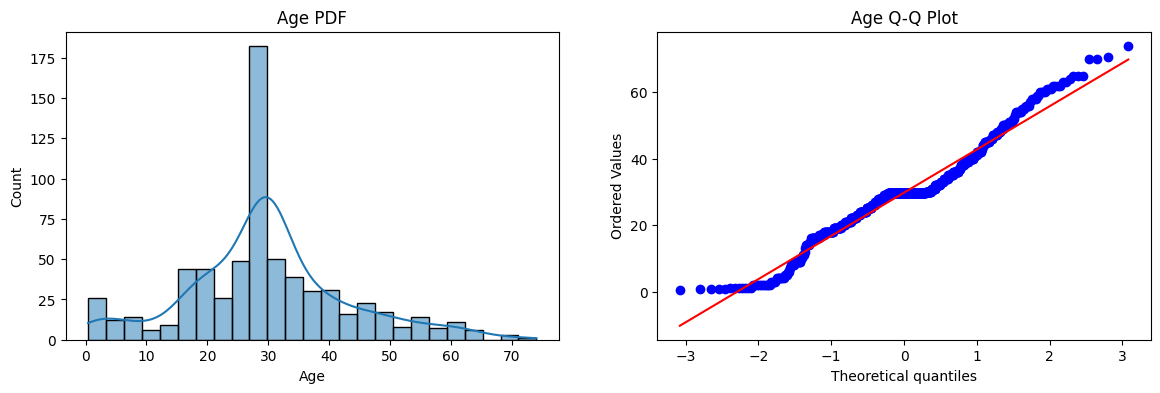

In [9]:
# Understanding the Distribution of Data for Age column
plt.figure(figsize=(14,4))
plt.subplot(121) #creates the first subplot in a 1-row, 2-column grid — this allows you to plot two charts side-by-side.
sns.histplot(X_train['Age'], kde=True)  # Add kde=True if you want to show the density curve
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Q-Q Plot')

Text(0.5, 1.0, 'Age Q-Q Plot')

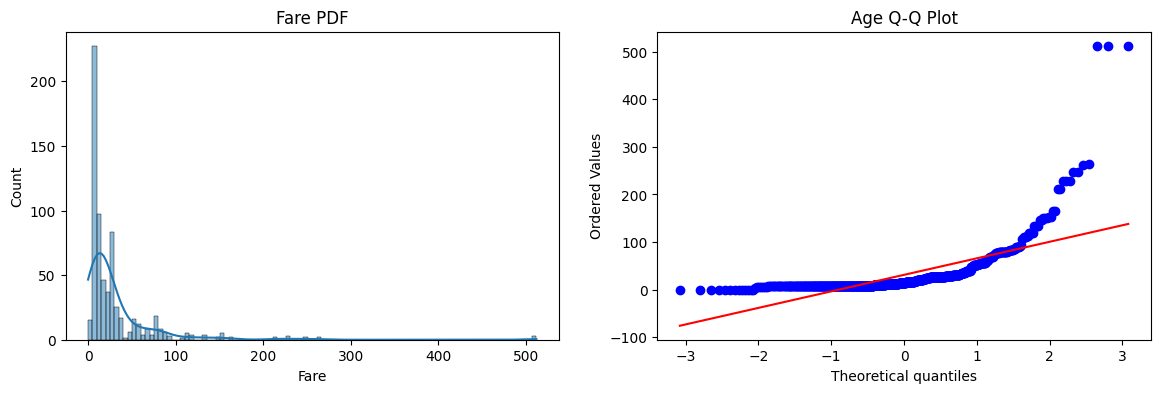

In [10]:
# Understanding the Distribution for Fare COlumn
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Age Q-Q Plot')

In [11]:
# Running Logistic and Decision Tree model on skewed data without Transformation
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

# Checking Accuracy of Both Models
print("Accuracy of LR", accuracy_score(Y_test, y_pred))
print("Accuracy of DT", accuracy_score(Y_test, y_pred2))

Accuracy of LR 0.6771300448430493
Accuracy of DT 0.6636771300448431


In [12]:
# Now Applyling Function Transformer
trf = FunctionTransformer(np.log1p)  #Square Transformation

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, Y_train)  #Y_train does require transformation as its categorical (yes/no)
clf2.fit(X_train_transformed, Y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

# Accuracy
print("Accuracy of LR:", accuracy_score(Y_test, y_pred))
print("Accuracy of DT:", accuracy_score(Y_test, y_pred2))

Accuracy of LR: 0.6860986547085202
Accuracy of DT: 0.672645739910314


In [14]:
# Runnig Cross-Validation on X 
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 =  DecisionTreeClassifier()

print("LR:", np.mean(cross_val_score(clf, X_transformed,Y, cv=10, scoring='accuracy')))
print("DT:", np.mean(cross_val_score(clf2, X_transformed,Y, cv=10, scoring='accuracy')))

LR: 0.678027465667915
DT: 0.6577153558052435


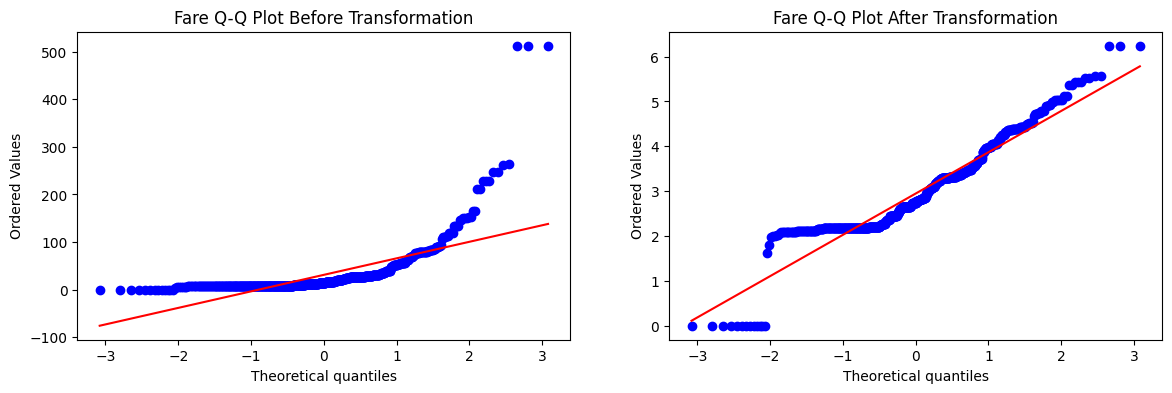

In [15]:
# Figures Comparing Data distribution before & after transformation
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Q-Q Plot Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("Fare Q-Q Plot After Transformation")

plt.show()

Text(0.5, 1.0, 'Fare Q-Q Plot After Transformation')

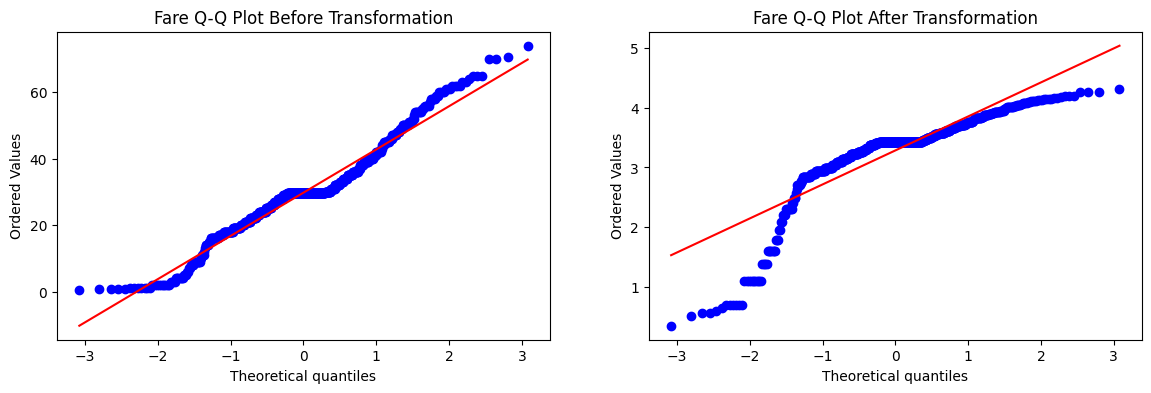

In [16]:
# Figures Comparing Data distribution before & after transformation
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Fare Q-Q Plot Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title("Fare Q-Q Plot After Transformation")

**As you can see Age kai upar Data Points aur spread away from Normal Distribution**

In [17]:
# Now Transforming only Fare Column using COlumn Transformer

trf2 = ColumnTransformer(transformers=[
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, Y_train)
clf2.fit(X_train_transformed2, Y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf.predict(X_test_transformed2)

print("Accuracy LR:", accuracy_score(Y_test, y_pred))
print("Accuracy DT:", accuracy_score(Y_test, y_pred2))

Accuracy LR: 0.6860986547085202
Accuracy DT: 0.6860986547085202


In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Avg LR:", np.mean(cross_val_score(clf, X_train_transformed2, Y_train, cv=10, scoring='accuracy')))
print("Avg DT:", np.mean(cross_val_score(clf2, X_train_transformed2, Y_train, cv=10, scoring='accuracy')))

Avg LR: 0.6661917684305745
Avg DT: 0.6586838534599729


In [20]:
# Creating A generalized Function summing up all the above steps-
def apply_transform(transform):
    X = df.iloc[:,1:]
    Y = df.iloc[:,0]

    trf = ColumnTransformer(transformers=[
        ('log', FunctionTransformer(transform), ['Fare'])
    ], remainder='passthrough')

    X_train = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy LR:", np.mean(cross_val_score(clf, X_train, Y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title("Fare Q-Q Plot before Transformation")

    plt.subplot(122)
    stats.probplot(X_train[:,0], dist='norm', plot=plt)
    plt.title("Fare Q-Q Plot After Transformation")

    plt.show()

In [21]:
X_train

,Age,Fare
61,38.000000,80.0000
546,19.000000,26.0000
358,29.699118,7.8792
166,29.699118,55.0000
673,31.000000,13.0000
...,...,...
177,50.000000,28.7125
723,50.000000,13.0000
574,16.000000,8.0500
878,29.699118,7.8958


Accuracy LR: 0.6611485642946316


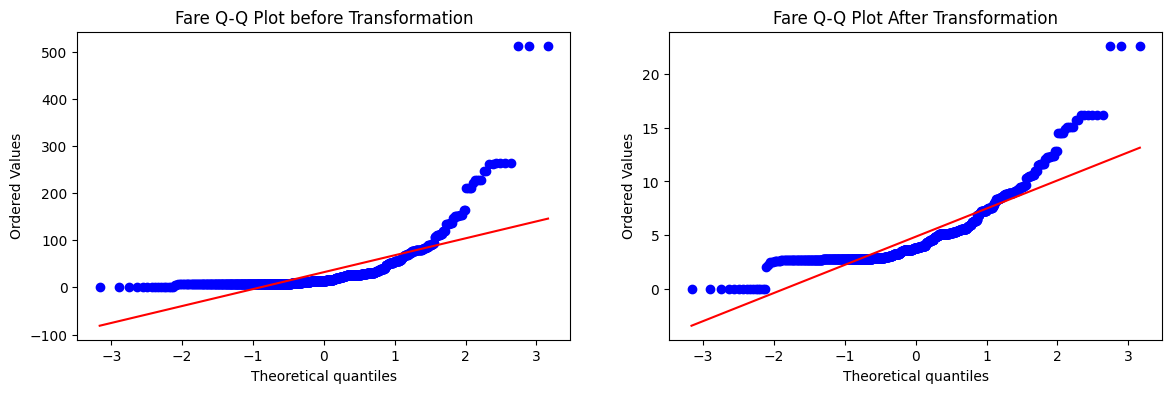

In [22]:
apply_transform(lambda x : np.sqrt(x))